<a href="https://colab.research.google.com/github/Lambru99/Fashion_MNIST_CNN/blob/main/Definitivo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape le immagini in modo da avere una dimensione aggiuntiva per il canale di colore (in questo caso 1, scala di grigi)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converti le etichette in formato one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [29]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)

CNN

In [4]:
model = tf.keras.Sequential()

# Convolutional layers
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1), name='conv1'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, name='maxpool1'))
model.add(tf.keras.layers.Dropout(0.3, name='dropout1'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', name='conv2'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, name='maxpool2'))
model.add(tf.keras.layers.Dropout(0.3, name='dropout2'))

# Flatten and dense layers
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(256, activation='relu', name='dense1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout3'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense2'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 64)        320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 dropout1 (Dropout)          (None, 14, 14, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 32)        8224      
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 32)          0         
                                                                 
 dropout2 (Dropout)          (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [6]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
cnn_results = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=10,
         validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 20s 9ms/step - loss: 0.5842 - accuracy: 0.7849 - val_loss: 0.3757 - val_accuracy: 0.8622
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4026 - accuracy: 0.8546 - val_loss: 0.3091 - val_accuracy: 0.8864
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3565 - accuracy: 0.8692 - val_loss: 0.2926 - val_accuracy: 0.8927
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3307 - accuracy: 0.8790 - val_loss: 0.2776 - val_accuracy: 0.8996
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3088 - accuracy: 0.8869 - val_loss: 0.2652 - val_accuracy: 0.9021
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2975 - accuracy: 0.8900 - val_loss: 0.2475 - val_accuracy: 0.9067
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2876 - accuracy: 0.8928 - val_loss: 0.2419 - val_accurac

In [8]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9057999849319458


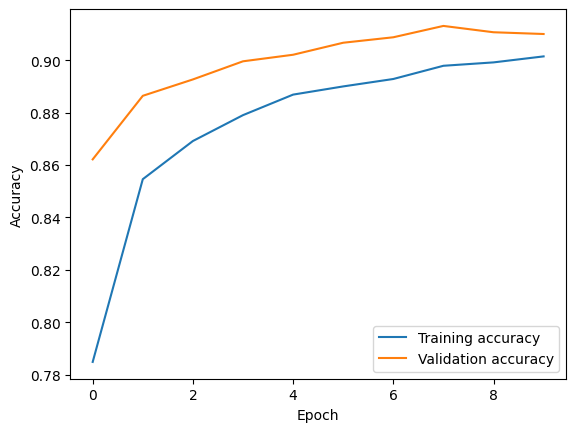

In [9]:
# Get training and validation accuracy
train_acc = cnn_results.history['accuracy']
val_acc = cnn_results.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()


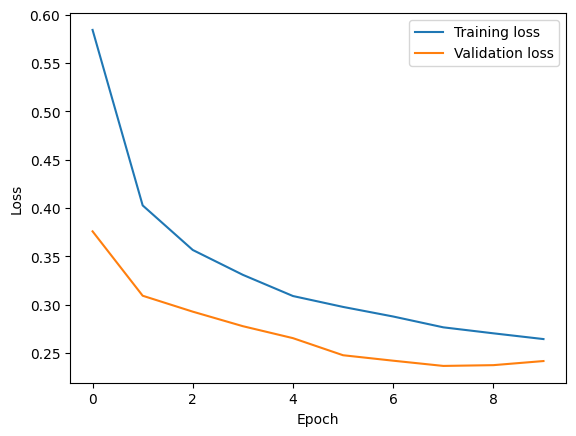

In [10]:
# Get training and validation loss
train_loss = cnn_results.history['loss']
val_loss = cnn_results.history['val_loss']

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## confusion matrix

313/313 [==============================] - 1s 2ms/step


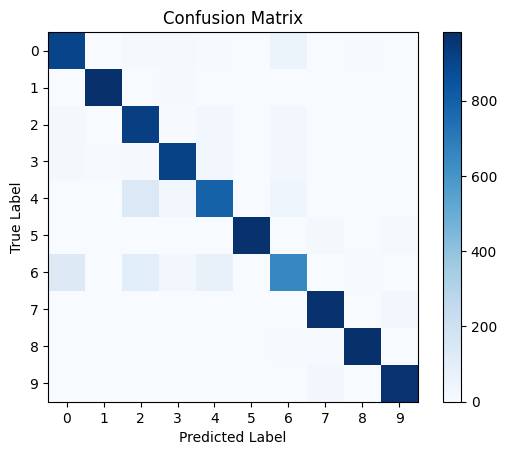

[[904   0  15  13   4   1  59   0   4   0]
 [  0 982   0  12   2   0   2   0   2   0]
 [ 17   0 923   6  29   0  25   0   0   0]
 [ 18   7  10 911  25   0  28   0   1   0]
 [  1   0 137  24 792   0  46   0   0   0]
 [  0   0   0   0   0 972   0  16   0  12]
 [130   0 106  30  73   0 654   0   7   0]
 [  0   0   0   0   0   2   0 972   0  26]
 [  1   1   1   3   3   1   4   4 981   1]
 [  1   0   0   0   0   3   0  29   0 967]]


In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(confusion_mtx)


##Linear readout

In [12]:
from tensorflow.keras.models import Model

def get_hidden_representation(layer_name):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(x_train)
    return intermediate_output

In [13]:
#conv1_output = get_hidden_representation("conv1")
conv2_output = get_hidden_representation("conv2")
dense_output = get_hidden_representation("dense1")

1875/1875 [==============================] - 3s 1ms/step


In [14]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(14, 14, 32)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = linear_model.fit(conv2_output, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4422 - accuracy: 0.8722 - val_loss: 0.3022 - val_accuracy: 0.8972
Epoch 2/10
750/750 [==============================] - 3s 3ms/step - loss: 0.2672 - accuracy: 0.9091 - val_loss: 0.2671 - val_accuracy: 0.9078
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2338 - accuracy: 0.9199 - val_loss: 0.2517 - val_accuracy: 0.9108
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2133 - accuracy: 0.9261 - val_loss: 0.2436 - val_accuracy: 0.9140
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1981 - accuracy: 0.9331 - val_loss: 0.2391 - val_accuracy: 0.9163
Epoch 6/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1871 - accuracy: 0.9351 - val_loss: 0.2347 - val_accuracy: 0.9159
Epoch 7/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1774 - accuracy: 0.9390 - val_loss: 0.2322 - val_accuracy: 0.9171
Epoch 

In [16]:
# valuta il modello sul set di test
score_conv2 = linear_model.evaluate(conv2_output, y_train, verbose=0)
# stampa l'accuratezza del test
print('\n', 'Test accuracy of the linear model with conv2 input:', score_conv2[1])


 Test accuracy of the linear model with conv2 input: 0.9452000260353088


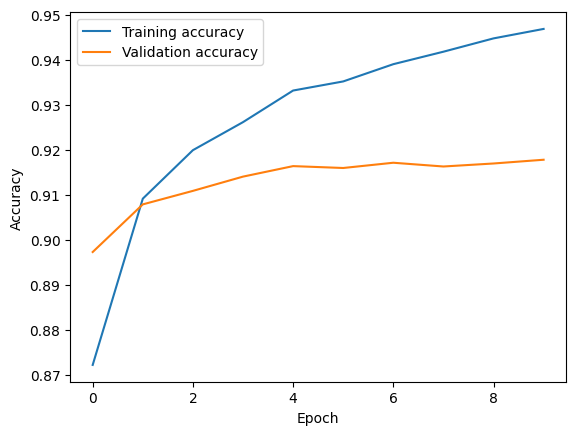

In [17]:
# Get training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()


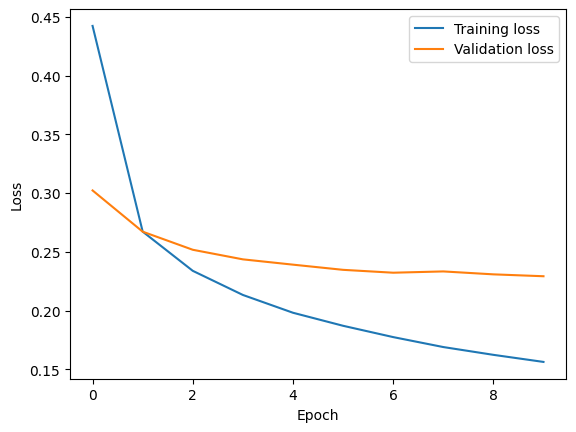

In [18]:
# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [19]:
linear_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
hystory2=linear_model2.fit(dense_output, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3516 - accuracy: 0.8940 - val_loss: 0.2447 - val_accuracy: 0.9112
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1922 - accuracy: 0.9306 - val_loss: 0.2336 - val_accuracy: 0.9137
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1796 - accuracy: 0.9346 - val_loss: 0.2290 - val_accuracy: 0.9152
Epoch 4/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1731 - accuracy: 0.9357 - val_loss: 0.2265 - val_accuracy: 0.9172
Epoch 5/10
750/750 [==============================] - 3s 3ms/step - loss: 0.1686 - accuracy: 0.9381 - val_loss: 0.2249 - val_accuracy: 0.9189
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1655 - accuracy: 0.9390 - val_loss: 0.2259 - val_accuracy: 0.9177
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1630 - accuracy: 0.9396 - val_loss: 0.2264 - val_accuracy: 0.9179
Epoch 

In [21]:
# valuta il modello sul set di test
score_dense = linear_model2.evaluate(dense_output, y_train, verbose=0)
# stampa l'accuratezza del test
print('\n', 'Test accuracy of the linear model with conv2 input:', score_dense[1])


 Test accuracy of the linear model with conv2 input: 0.9368666410446167


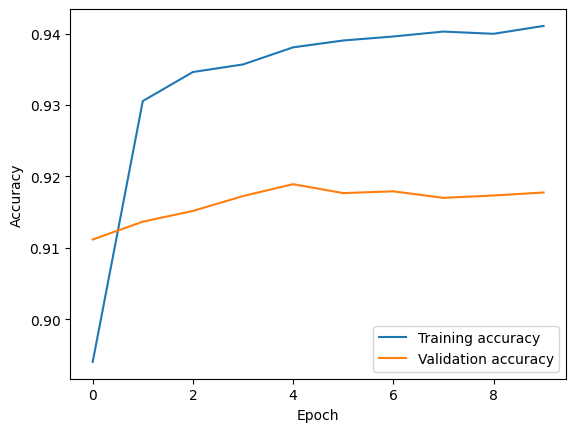

In [22]:
# Get training and validation accuracy
train_acc2 = hystory2.history['accuracy']
val_acc2 = hystory2.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc2, label='Training accuracy')
plt.plot(val_acc2, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()

## Feature Visualization Method

In [25]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


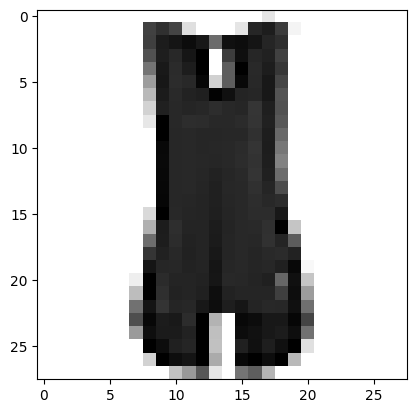

LABEL: T-shirt/top
conv1 (1, 28, 28, 64) 


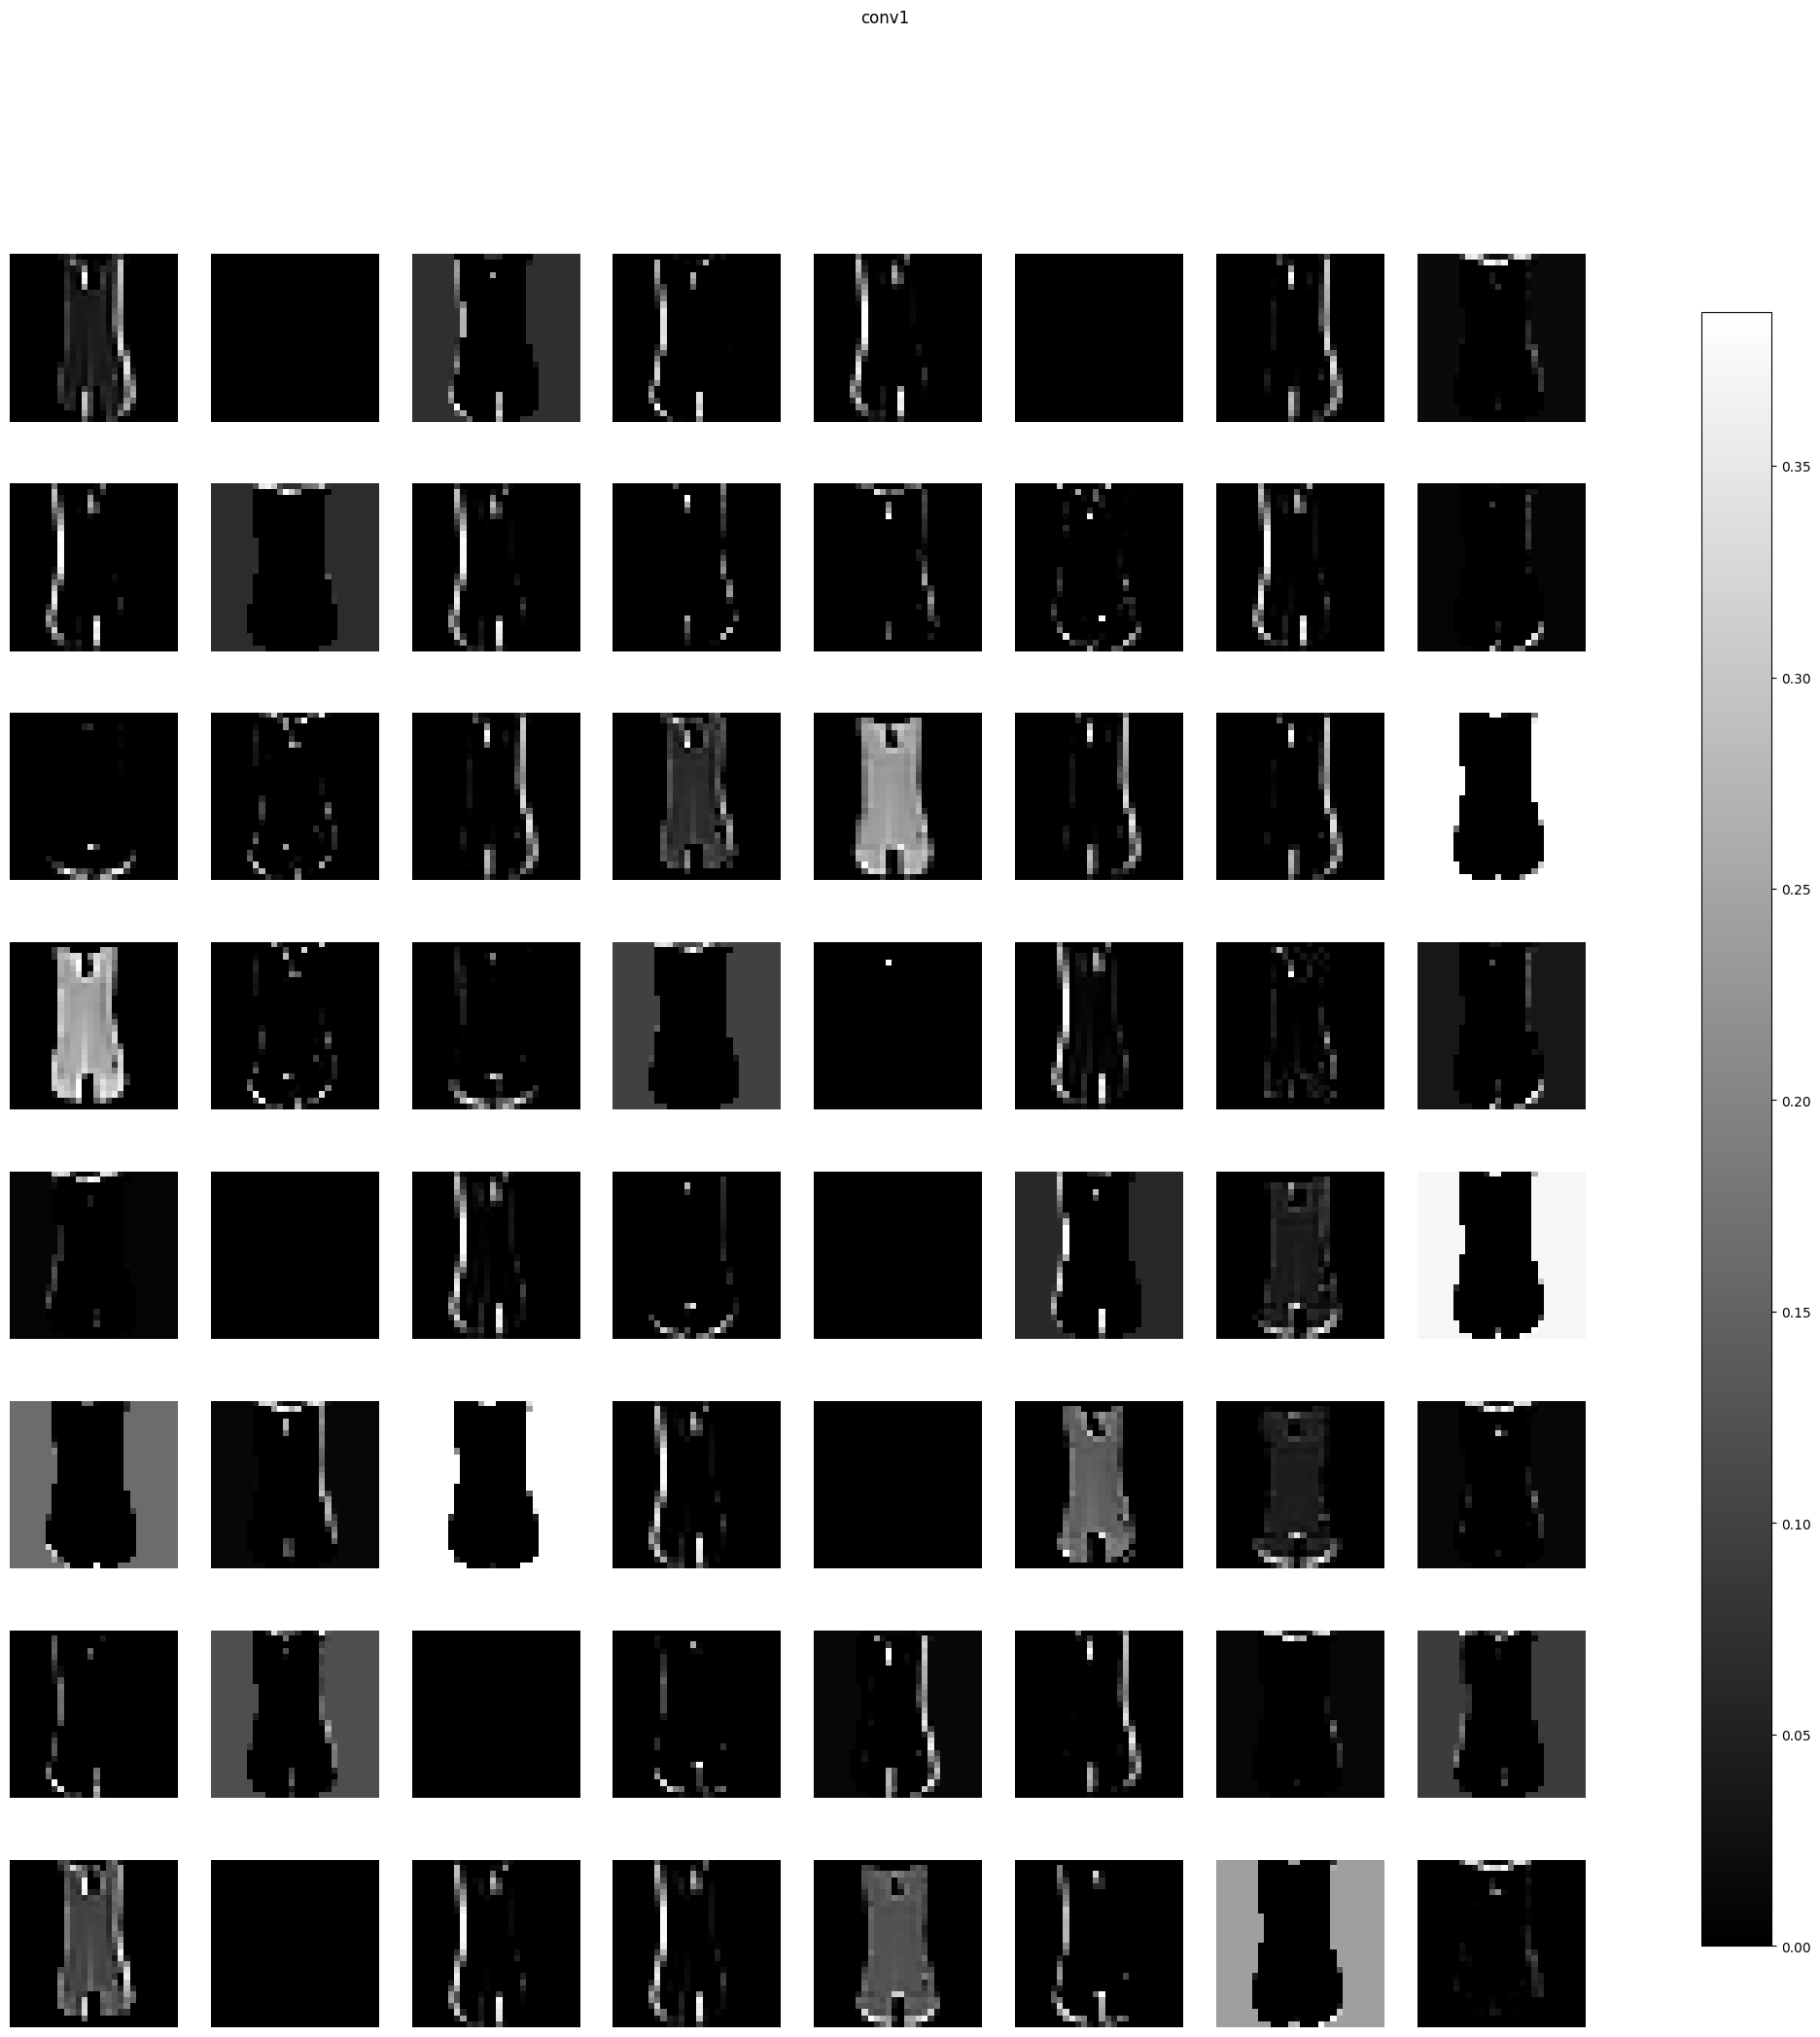

conv2 (1, 14, 14, 32) 


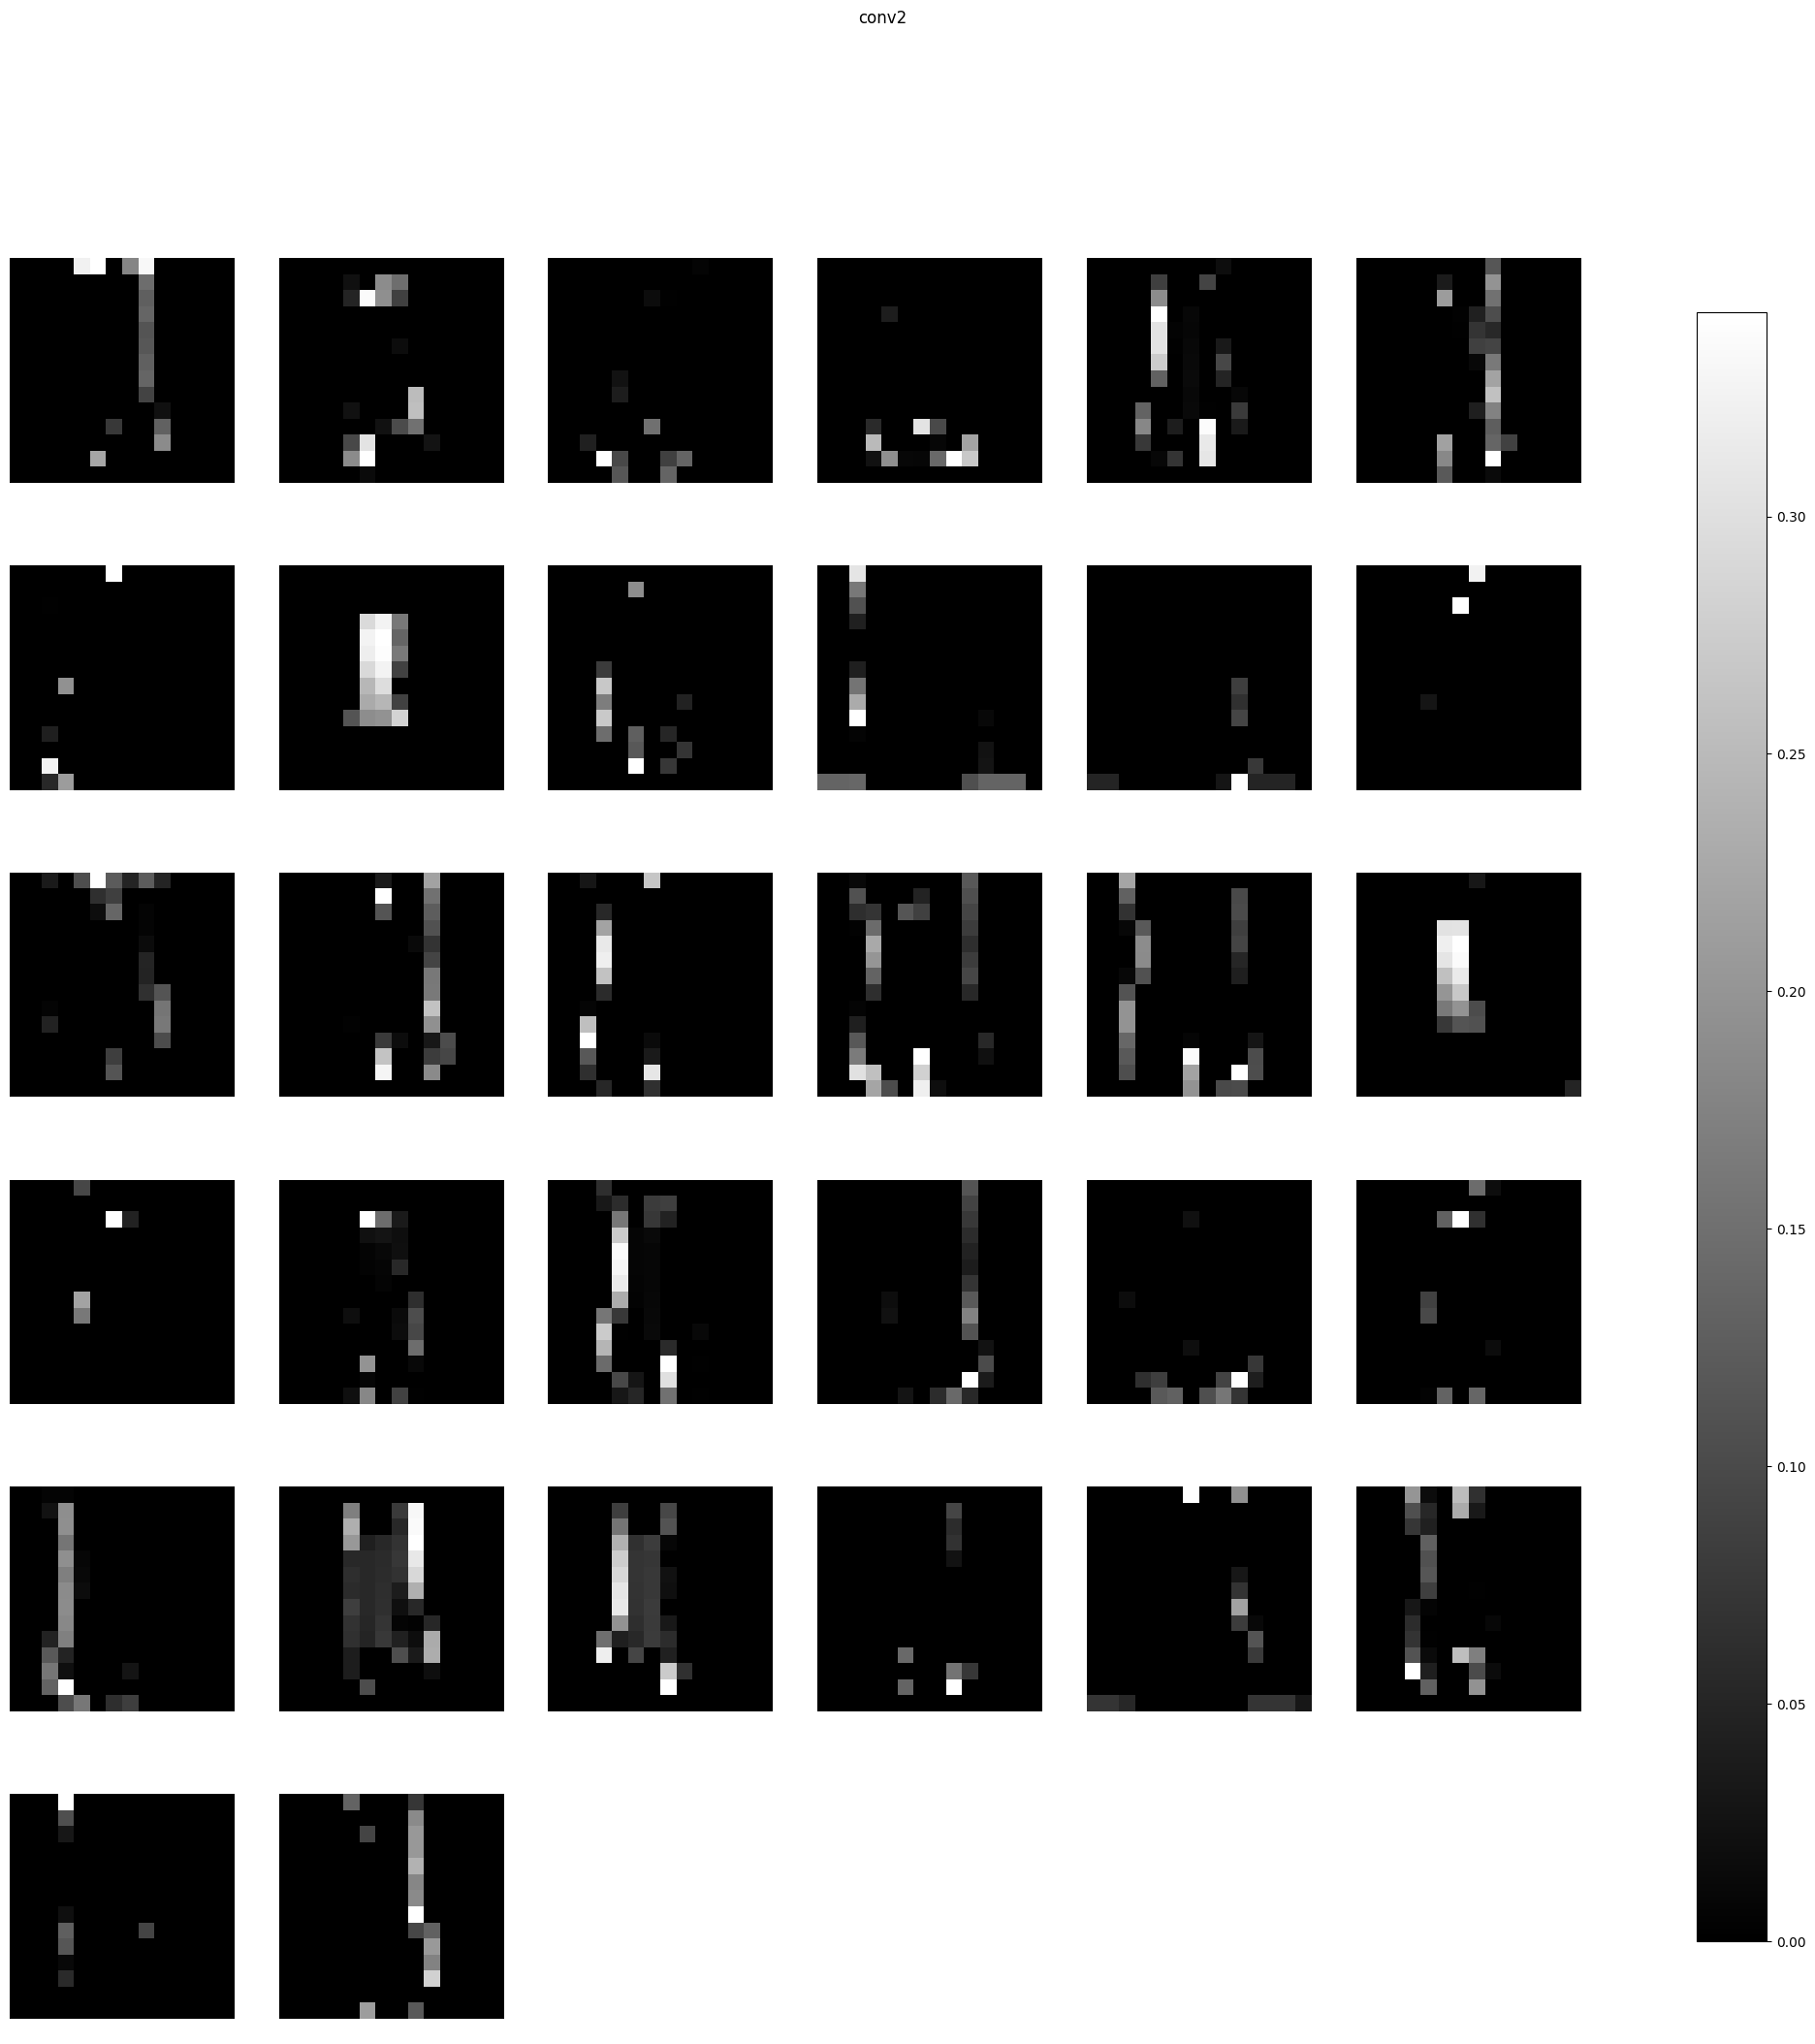

dense1 (1, 256) 


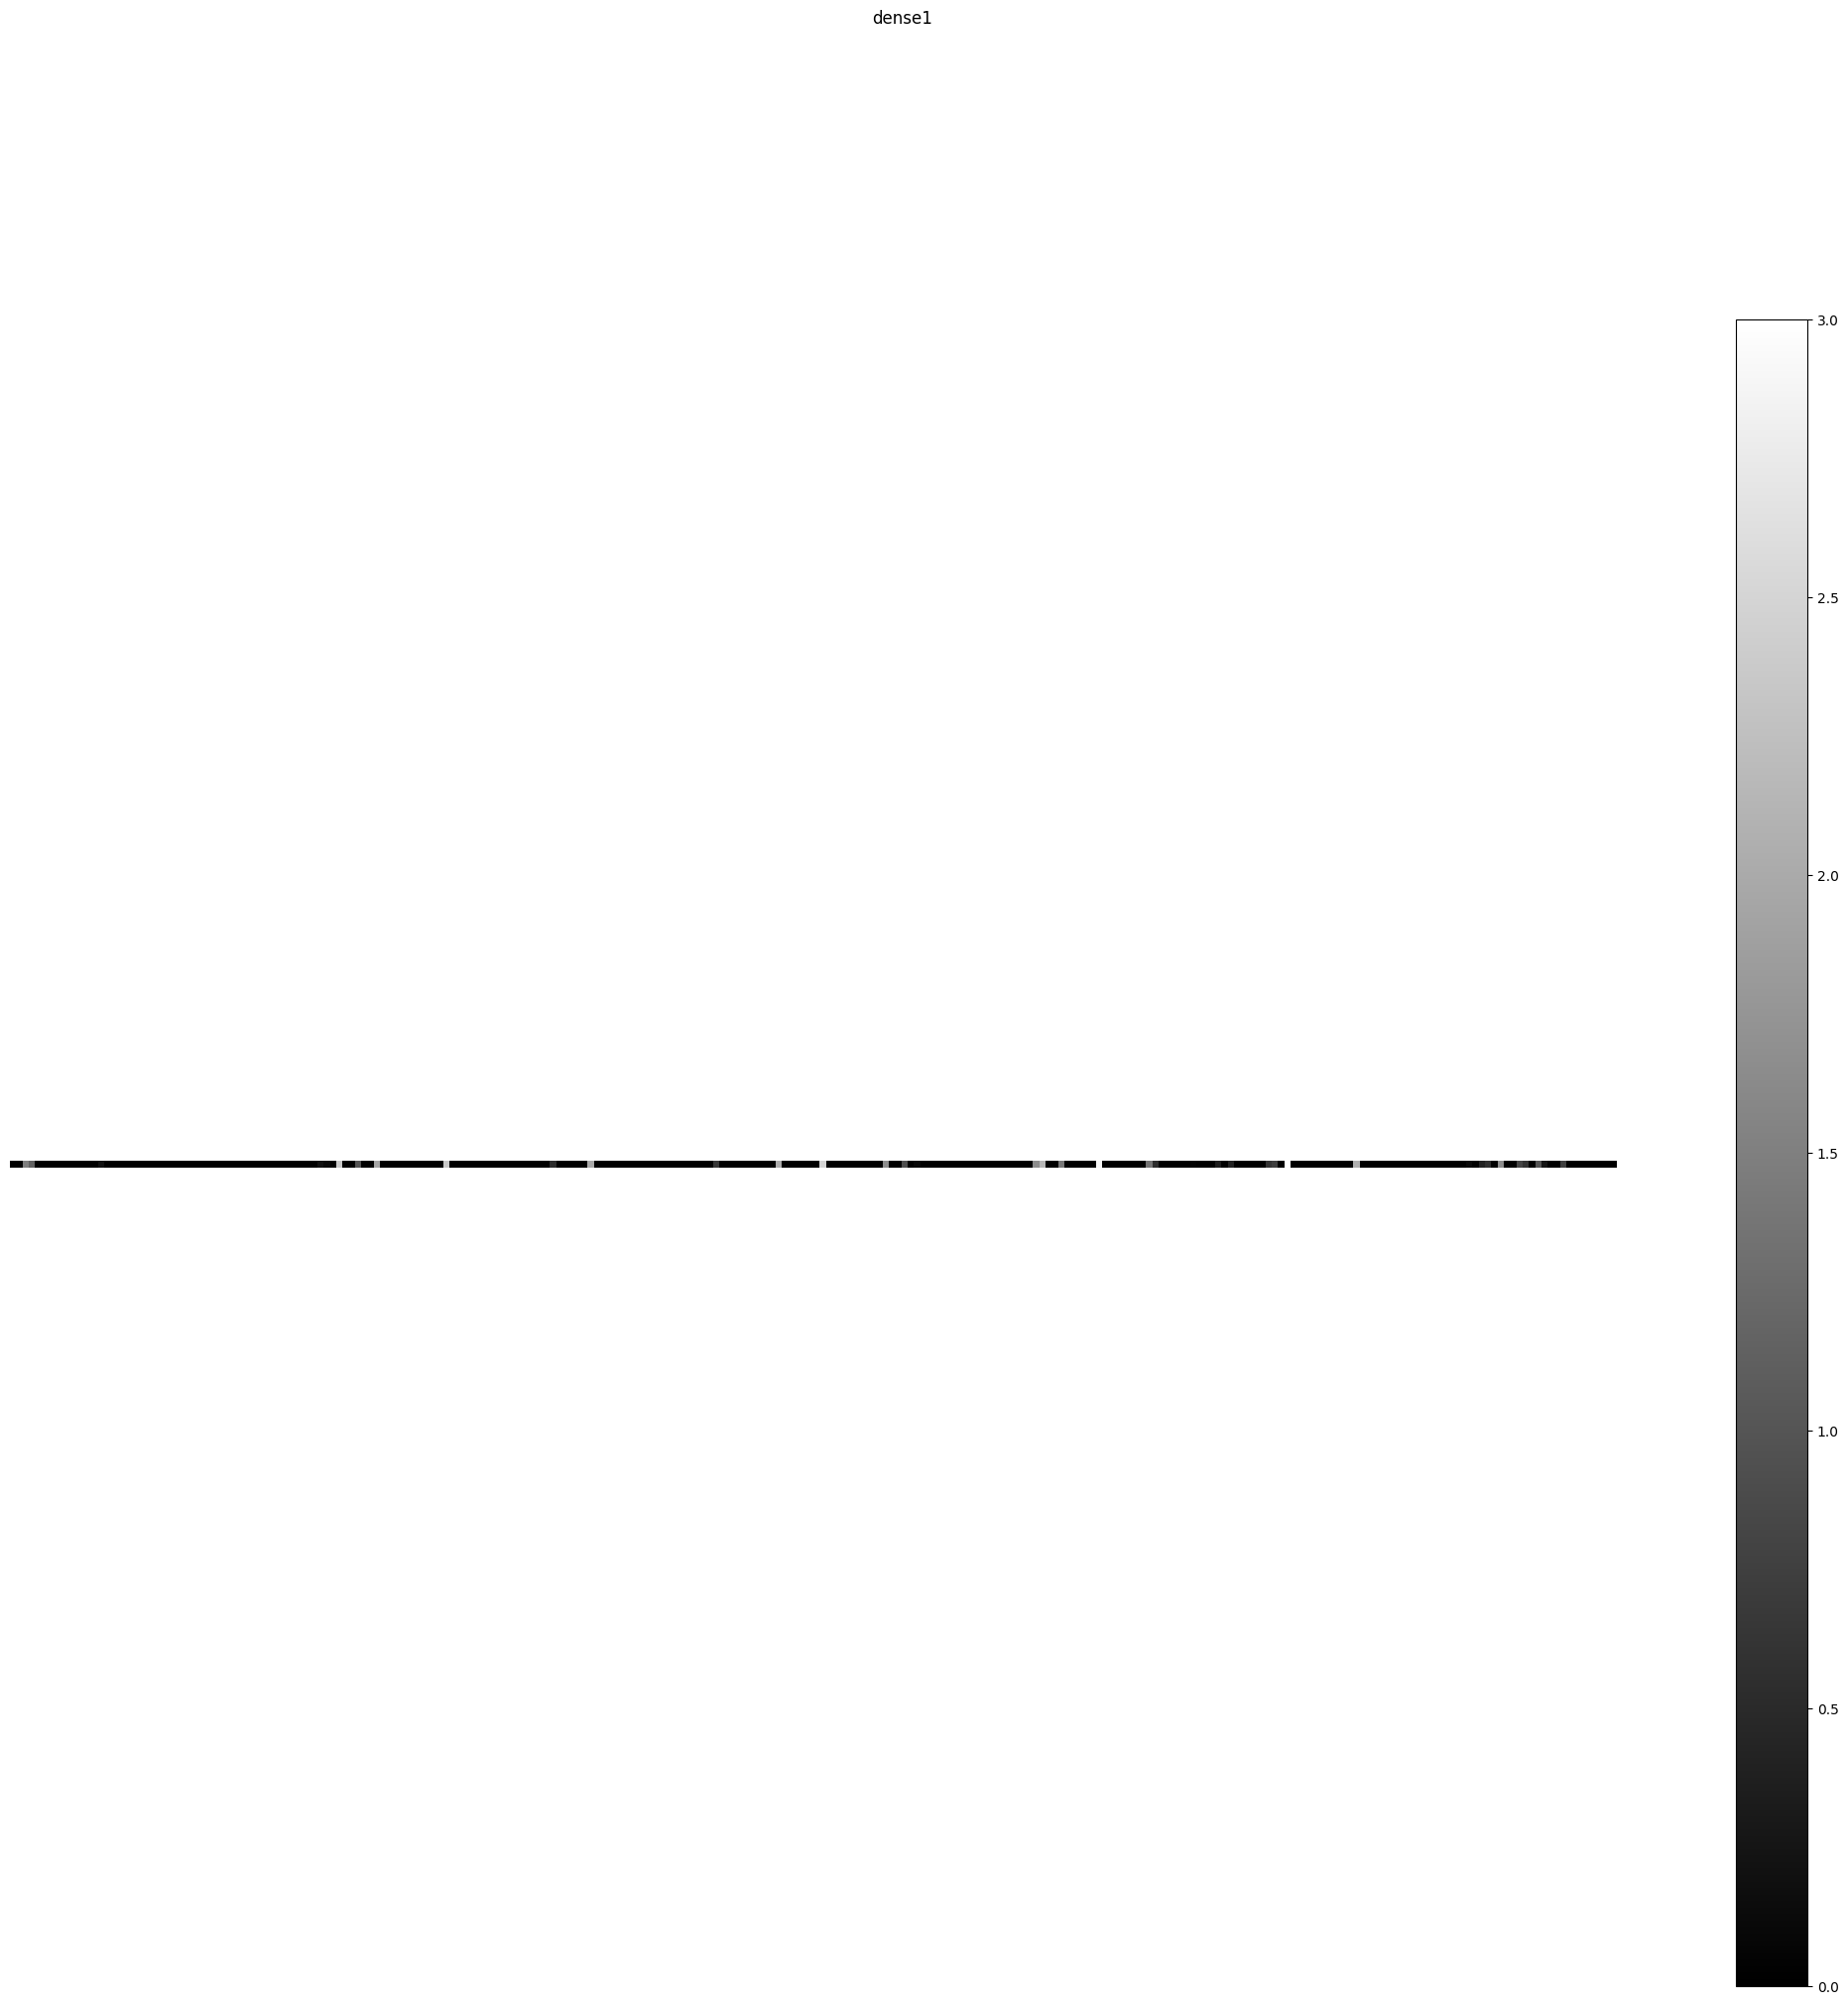

dense2 (1, 10) 


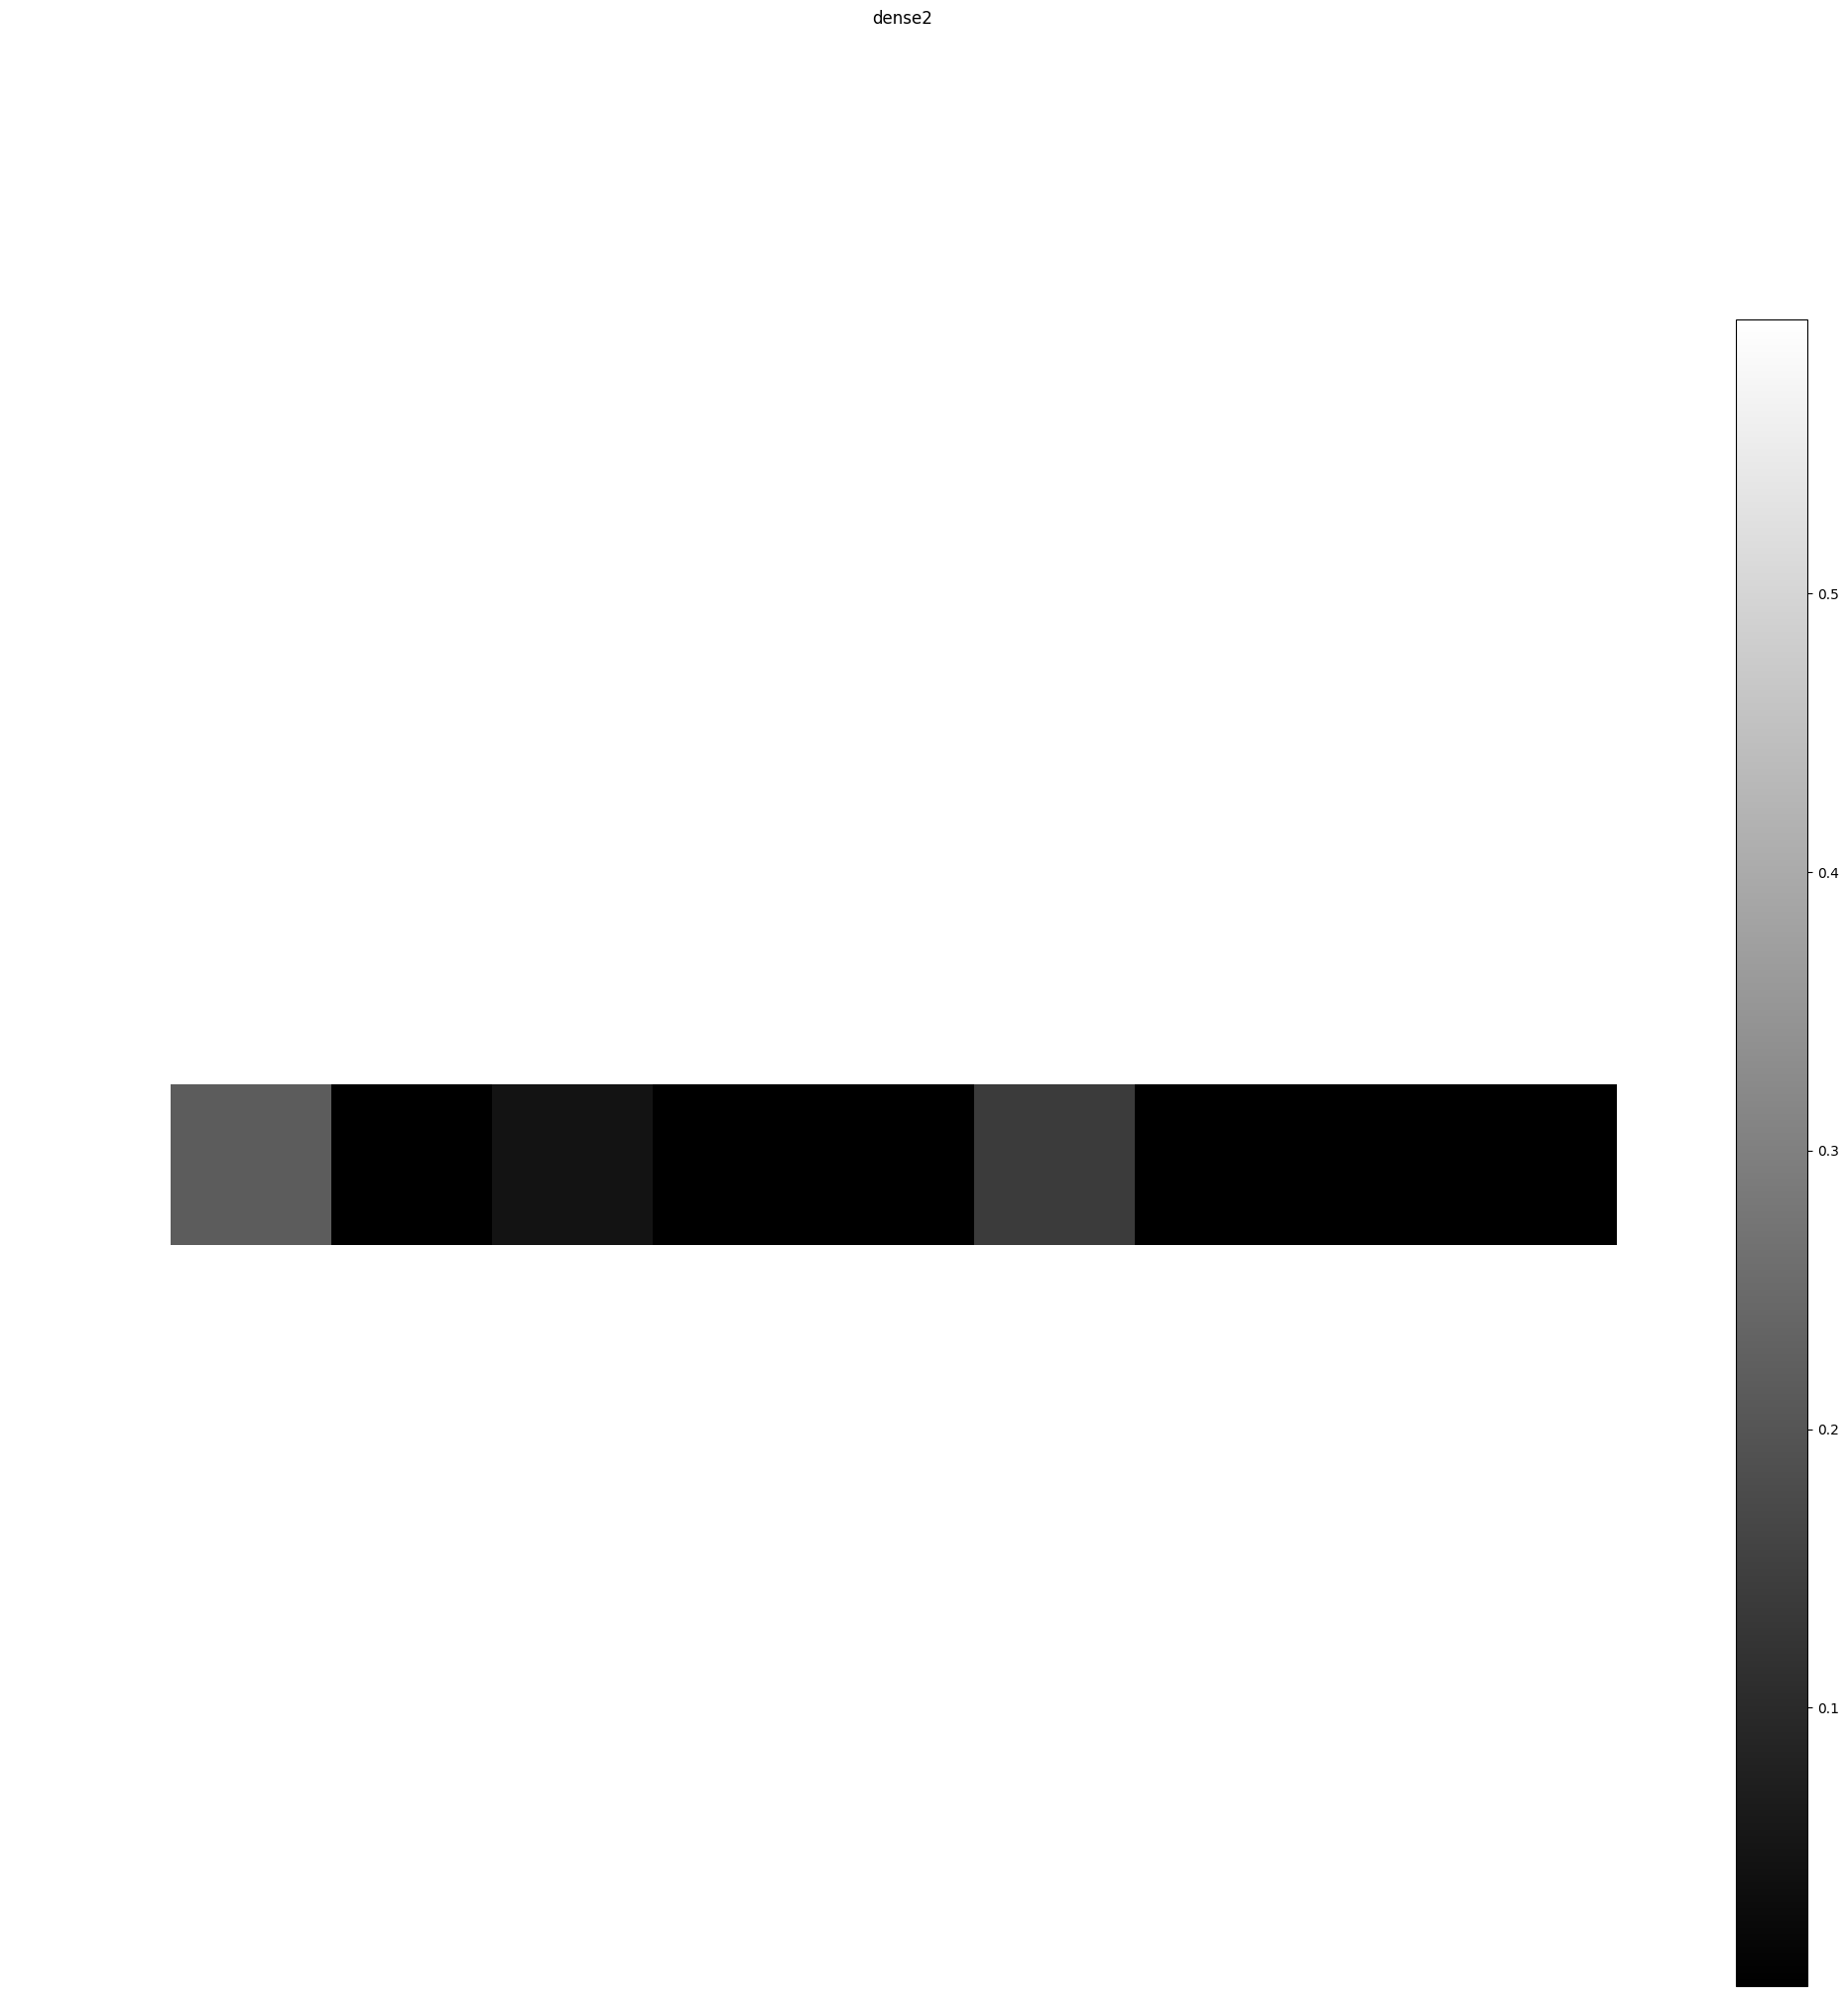

In [32]:
!pip install keract
from keract import get_activations, display_activations
layer_names=['conv1', 'conv2','dense1', 'dense2']
activations_cnn = get_activations(model, x_train[4:5], layer_names=layer_names)
#Plot the image and it's label
plt.imshow(x_train[4],cmap = plt.cm.gray_r,interpolation = "nearest")
plt.show()
print("LABEL: %s"%labels[np.argmax(y_train[4])])

#Plot the feature maps for each layer of the CNN
display_activations(activations_cnn, cmap='gray', save=False)